### Import the libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load the dataset

In [2]:
#reading csv file
df=pd.read_csv(r"C:\Users\rakhi\Downloads\titanic_dataset (1).csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# setting passenger id as index
df.set_index("PassengerId",inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 11)

In [5]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Handling null values

In [9]:
#finding number of missing values
missing_values=df.isna().sum()
missing_values

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

There are null values.

In [10]:
#finding percentage of missing values
percent=missing_values[missing_values>0]/len(df)*100
percent

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

Since the column Cabin contains more than 77% missing values, we can drop the column

In [11]:
df.drop(['Cabin'],axis=1,inplace=True)

In [12]:
# filling missing values of 'age' by median of 'age'
med=df['Age'].median()
df['Age']=df['Age'].fillna(med)

In [13]:
# filling missing values of 'embraked' by mode of that column
mod=df['Embarked'].mode()[0]
df['Embarked']=df['Embarked'].fillna(mod)

In [14]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

There are no more null values

### Check for duplicates

In [15]:
df.duplicated().any()

False

There are no duplicate values.

### Outlier handling

<AxesSubplot:>

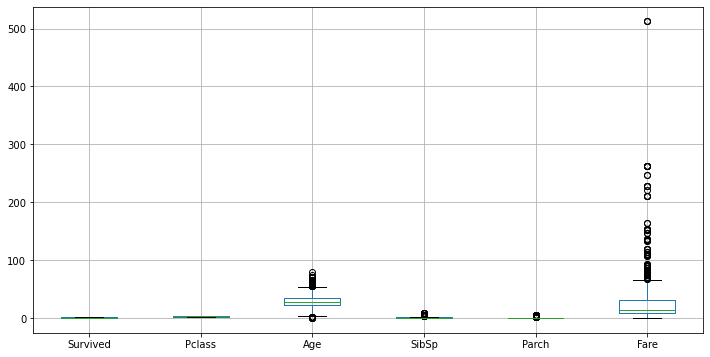

In [16]:
plt.figure(figsize=(12,6))
df.boxplot()

Age, SibSp, Parch and Fare has outliers. These are realistic values so we dont handle it or drop it.

<AxesSubplot:>

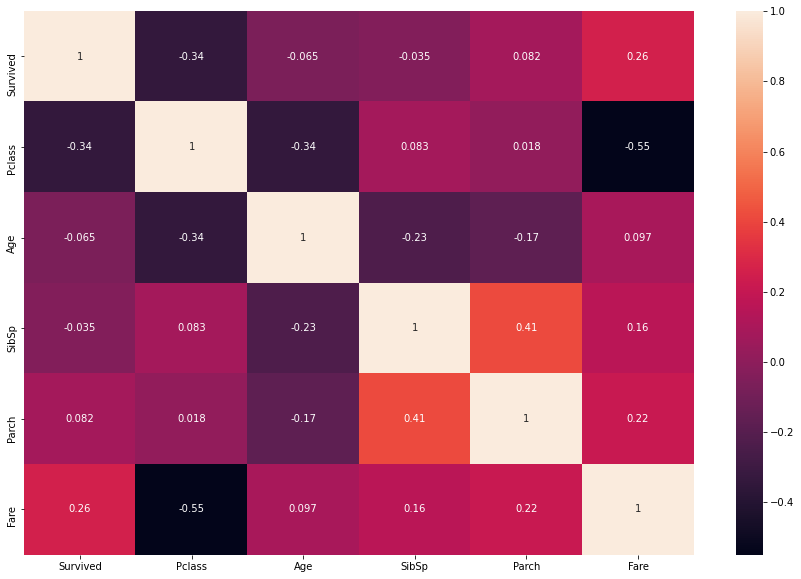

In [17]:
# checking correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

Pclass is highly negatively correlated with survived, age and fare.

### Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
a=["Sex","Embarked"]
for i in np.arange(len(a)):
    df[a[i]]= le.fit_transform(df[a[i]])

In [19]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


### Visualisation

<AxesSubplot:ylabel='Survived'>

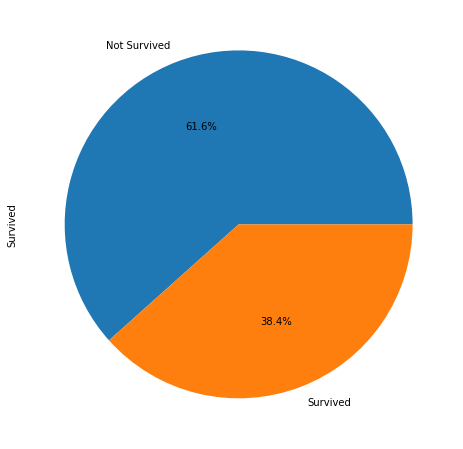

In [20]:
labels = ['Not Survived','Survived']
df.Survived.value_counts().plot(kind="pie",labels=labels,autopct='%.1f%%',figsize=(8,8))

As majority of passengers died, the dataset is not balanced.

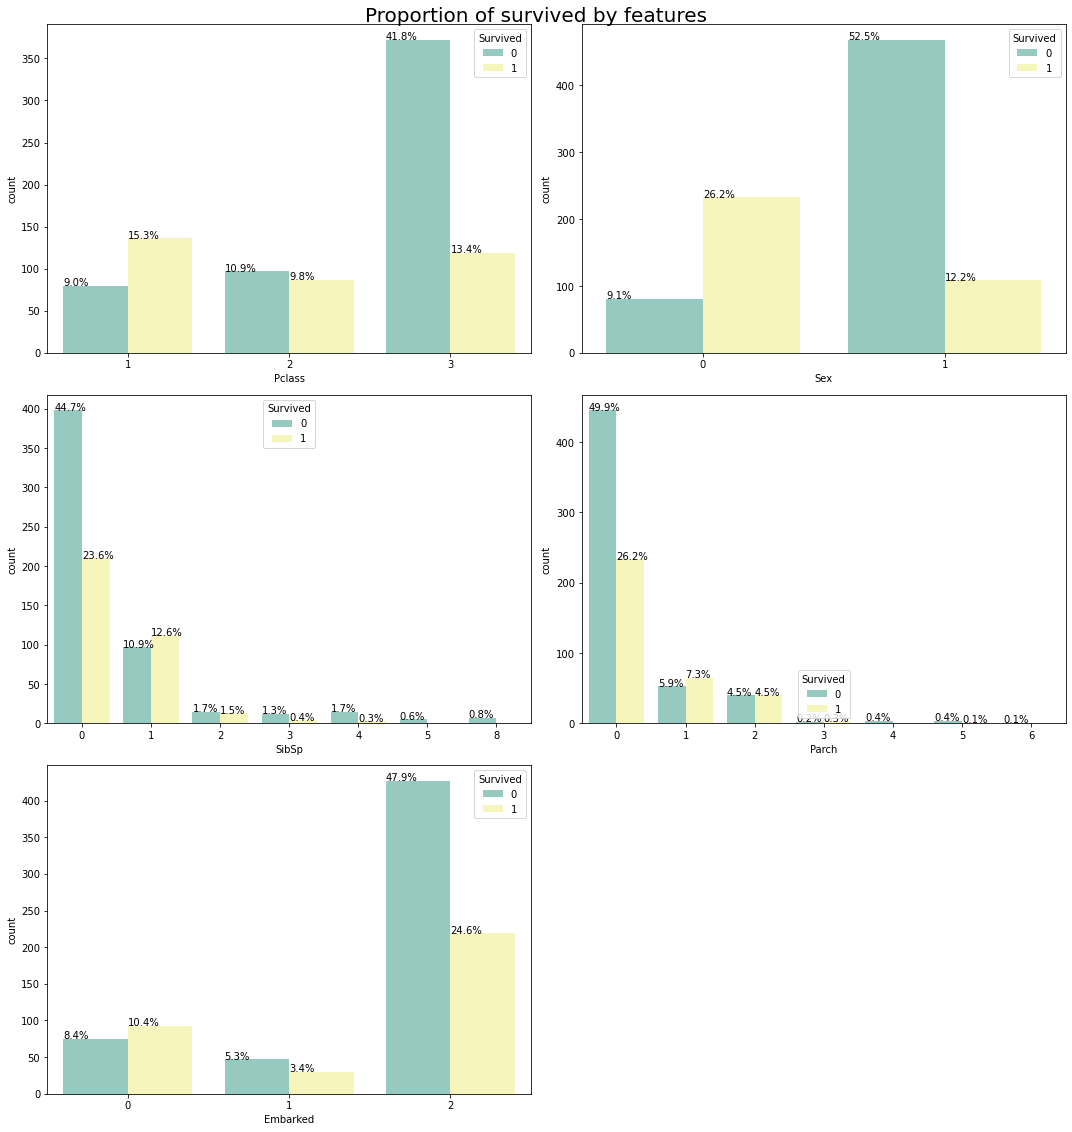

In [21]:
plt.figure(figsize=(15,16))
plt.suptitle("Proportion of survived by features",fontsize=20)
col=["Pclass","Sex","SibSp","Parch","Embarked"]
for i, j in enumerate(col):
    plt.subplot(3,2, i+1)
    ax=sns.countplot(df[j],hue=df["Survived"],palette="Set3")
    total = float(len(df))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x()
        y = p.get_height()
        ax.annotate(percentage,(x, y))
plt.tight_layout()

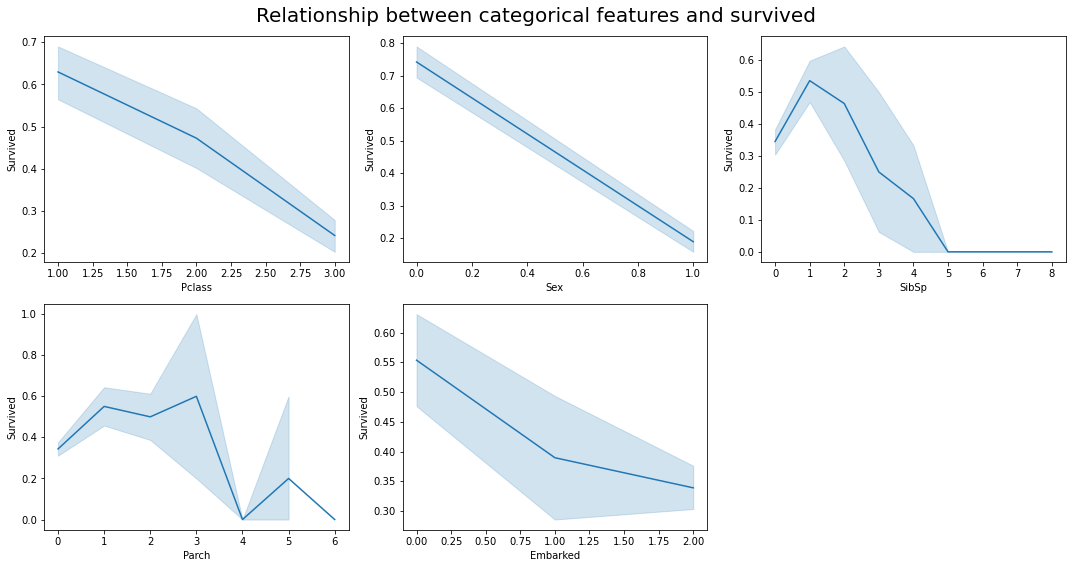

In [22]:
plt.figure(figsize=(15,8))
plt.suptitle("Relationship between categorical features and survived",fontsize=20)
for i, j in enumerate(col):
    plt.subplot(2,3, i+1)
    sns.lineplot(x=df[j],y=df["Survived"])
plt.tight_layout()

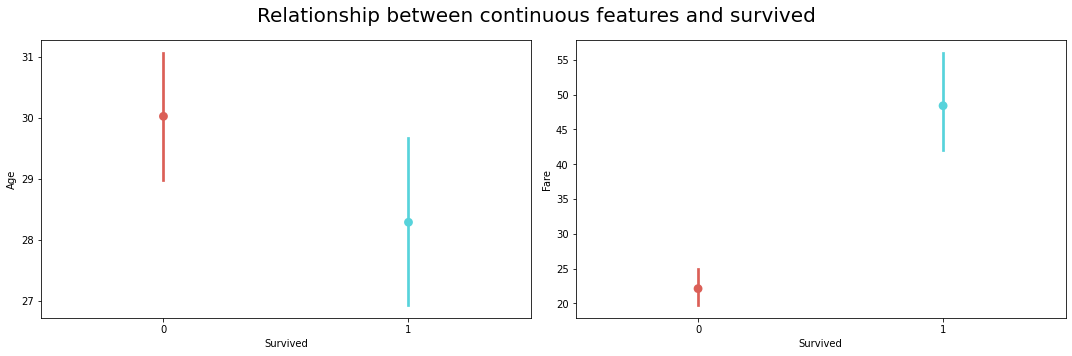

In [23]:
plt.figure(figsize=(15,5))
plt.suptitle("Relationship between continuous features and survived",fontsize=20)
cont_col=["Age","Fare"]
for i, j in enumerate(cont_col):
    plt.subplot(1,2, i+1)
    sns.pointplot(y=df[j],x=df["Survived"],palette="hls")
plt.tight_layout()

#### Inference

1. Females have a much higher chance of survival than males.
2. People with higher socioeconomic class had a higher rate of survival.
3. People with more siblings or spouses aboard were less likely to survive. But people with no siblings or spouses were less to likely to survive than those with one or two.
4. People with less than four parents or children aboard are more likely to survive than those with four or more. But people traveling alone are less likely to survive than those with 1-3 parents or children.
5. People whose age is very low are more likely to survive.

### Feature reduction

In [24]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

### Scaling data

In [25]:
x = df.drop(["Survived"], axis=1)
y = df["Survived"]

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaled= MinMaxScaler()
x=scaled.fit_transform(x)
x=pd.DataFrame(x)

### Spliting to training data and test data

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Model Building

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

### Logistic Regression

In [29]:
lg = LogisticRegression()
lg.fit(x_train, y_train)

LogisticRegression()

In [30]:
y_pred=lg.predict(x_test)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [33]:
confusion_matrix(y_test,y_pred)

array([[89, 16],
       [20, 54]], dtype=int64)

### Naive Bayes

In [34]:
nb_cls = GaussianNB()  
nb_cls.fit(x_train, y_train) 

GaussianNB()

In [35]:
y_pred=nb_cls.predict(x_test)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179



In [38]:
confusion_matrix(y_test,y_pred)

array([[82, 23],
       [17, 57]], dtype=int64)

### Decision Tree

In [39]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
y_pred=dtc.predict(x_test)

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       105
           1       0.72      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [43]:
confusion_matrix(y_test,y_pred)

array([[83, 22],
       [18, 56]], dtype=int64)

### Random Forest

In [44]:
rc=RandomForestClassifier()
rc.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
y_pred=rc.predict(x_test)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [48]:
confusion_matrix(y_test,y_pred)

array([[90, 15],
       [17, 57]], dtype=int64)

### SVC

In [49]:
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [50]:
y_pred=sv.predict(x_test)

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



In [53]:
confusion_matrix(y_test,y_pred)

array([[96,  9],
       [27, 47]], dtype=int64)

### KNN

In [54]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [55]:
y_pred=knn.predict(x_test)

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [58]:
confusion_matrix(y_test,y_pred)

array([[90, 15],
       [19, 55]], dtype=int64)

### Conclusion

We can see that Random Forest Classifier and KNN Classifier is found to be the best among all the other models.